In [ ]:
import yfinance as yf
from google.colab import files

# Fetch 2-minute interval data for Bitcoin
data = yf.download(tickers='BTC-USD', period='1mo', interval='2m')

# Display the data
print(data)

# Save the data to a CSV file
file_path = '/content/BTC-USD_short_range.csv'
data.to_csv(file_path)

# Download the CSV file
files.download(file_path)

[*********************100%***********************]  1 of 1 completed


Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-11-30 18:14:00+00:00  96915.437500  96915.437500  96915.437500   
2024-11-30 18:16:00+00:00  96913.867188  96913.867188  96913.867188   
2024-11-30 18:18:00+00:00  96935.085938  96935.085938  96935.085938   
2024-11-30 18:20:00+00:00  96927.210938  96927.210938  96945.335938   
2024-11-30 18:22:00+00:00  96913.468750  96913.468750  96913.468750   
...                                 ...           ...           ...   
2024-12-31 18:04:00+00:00  93931.648438  93931.648438  93931.648438   
2024-12-31 18:06:00+00:00  93922.148438  93922.148438  93922.148438   
2024-12-31 18:08:00+00:00  94133.570312  94133.570312  94208.062500   
2024-12-31 18:10:00+00:00  94126.648438  94126.648438  94126.648438   
2024-12-31 18:12:00+00:00  94099.125000  94099.125000  94099.125000   

Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_hourly_data(symbol, currency, limit=2000, to_timestamp=None):
    url = "https://min-api.cryptocompare.com/data/v2/histoday"

    # Define the parameters for the request
    params = {
        "fsym": symbol,
        "tsym": currency,
        "limit": limit,  # Number of data points (max 2000)
        "toTs": to_timestamp,  # End time (timestamp)
        "e": "CCCAGG"  # Data exchange
    }

    # Send the request
    response = requests.get(url, params=params)

    # Check
    if response.status_code == 200:
        data = response.json()
        prices = data['Data']['Data']

        # Convert the timestamp to datetime
        df = pd.DataFrame(prices)
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

def get_two_years_of_hourly_data(symbol, currency):
    # Initialize empty DataFrame to store all data
    all_data = pd.DataFrame()

    # Get the current time as the end timestamp (current date)
    end_time = int(datetime.now().timestamp())

    # Iterate to get 2000 points per request
    for _ in range(9):  # 9 requests * 2000 = 18,000 points (close to 2 years)
        df = fetch_hourly_data(symbol, currency, limit=2000, to_timestamp=end_time)

        if df is not None:
            all_data = pd.concat([all_data, df], ignore_index=True)
            # Update end_time for the next request
            end_time = int(df['time'].min().timestamp()) - 1
        else:
            break

    # Reset index and return the full data
    all_data.reset_index(drop=True, inplace=True)

    return all_data

# Fetch 2 years of hourly data for Bitcoin (BTC) to USD
btc_hourly_data = get_two_years_of_hourly_data('BTC', 'USD')

# Save the data to a CSV file
if not btc_hourly_data.empty:
    btc_hourly_data.to_csv('btc_hourly_2_years_data.csv', index=False)
    print("Hourly data for the past 2 years downloaded and saved as 'btc_hourly_2_years_data.csv'")
    from google.colab import files
files.download('btc_hourly_2_years_data.csv')

Hourly data for the past 2 years downloaded and saved as 'btc_hourly_2_years_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import yfinance as yf

# Fetch Bitcoin daily data for the max available period
btc_data = yf.download("BTC-USD", period="max", interval="1d")

# Print and save the data
print(btc_data)
btc_data.to_csv("bitcoin_max_period_daily_data.csv")
# Save the data to a CSV file
btc_data.to_csv("bitcoin_daily_data.csv")

[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2024-12-26  95795.515625  95795.515625  99884.570312  95137.882812   
2024-12-27  94164.859375  94164.859375  97294.843750  93310.742188   
2024-12-28  95163.929688  95163.929688  95525.898438  94014.289062   
2024-12-29  93530.226562  93530.226562  95174.875000  92881.789062   
2024-12-30  91967.500000  91967.500000  94005.796875  91392.875000   

Price              

In [ ]:
import yfinance as yf

# Download Bitcoin data for the max available period with a 1-day interval
btc_data = yf.download("BTC-USD", period="max", interval="1d")

# Check
if btc_data.empty:
    print("No data downloaded.")
else:
    # Save the data to a CSV file
    btc_data.to_csv("bitcoin_daily_data.csv")
    print("Data downloaded and saved as 'bitcoin_daily_data.csv'")

[*********************100%***********************]  1 of 1 completed

Data downloaded and saved as 'bitcoin_daily_data.csv'


In [ ]:
from google.colab import files

# Download the file
files.download('bitcoin_daily_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Cleaning and Preprocessing of the fetched data**

In [2]:
import pandas as pd

S_data = 'https://raw.githubusercontent.com/selam-max/BT/main/BTC-USD_short_range.csv'
df = pd.read_csv(S_data)
print(df.head())

                       Price      Adj Close          Close           High  \
0                     Ticker        BTC-USD        BTC-USD        BTC-USD   
1                   Datetime            NaN            NaN            NaN   
2  2024-11-30 09:20:00+00:00  96758.8828125  96758.8828125  96775.7890625   
3  2024-11-30 09:24:00+00:00  96746.0546875  96746.0546875  96746.0546875   
4  2024-11-30 09:26:00+00:00       96712.75       96712.75       96712.75   

             Low           Open   Volume  
0        BTC-USD        BTC-USD  BTC-USD  
1            NaN            NaN      NaN  
2  96758.8828125  96775.7890625        0  
3  96746.0546875  96746.0546875        0  
4       96712.75       96712.75        0  


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
total_missing = df.isnull().sum().sum()
print(f'Total missing values: {total_missing}')
missing_percentage = (df.isnull().mean()) * 100
print(missing_percentage)

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64
Total missing values: 6
Price        0.000000
Adj Close    0.004558
Close        0.004558
High         0.004558
Low          0.004558
Open         0.004558
Volume       0.004558
dtype: float64


In [ ]:
print(df.dtypes)

Price        object
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object


In [ ]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')
df_cleaned.fillna(0, inplace=True)
df_interpolated = df_cleaned.interpolate(method='linear')

# Check for missing values
missing_values_after_interpolation = df_interpolated.isnull().sum()
print(missing_values_after_interpolation)

Price        0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


**Address outliers**

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Cap outliers
capped_df = numeric_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Replace cleaned data back
df[numeric_df.columns] = capped_df

# Verify the result
print(df.describe())

         Price     Adj Close         Close           High          Low  \
count    21938         21937         21937          21937        21937   
unique   21938         21749         21749          21737        21752   
top     Ticker  98588.828125  98588.828125  94980.9140625  98195.78125   
freq         1             3             3              3            3   

               Open Volume  
count         21937  21937  
unique        21747   8998  
top     98195.78125      0  
freq              3   9391  


In [ ]:
import numpy as np
# Convert numeric columns, coercing errors to NaN
columns_to_convert = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the changes
print(df.info())
# Filter rows with 'top' value for 'Adj Close'
anomalies = df[df['Adj Close'] == 98588.828125]
print(anomalies)
df['Volume'] = df['Volume'].replace(0, np.nan)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21938 entries, 0 to 21937
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      21938 non-null  object 
 1   Adj Close  21936 non-null  float64
 2   Close      21936 non-null  float64
 3   High       21936 non-null  float64
 4   Low        21936 non-null  float64
 5   Open       21936 non-null  float64
 6   Volume     21936 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB
None
                           Price     Adj Close         Close          High  \
3190   2024-12-04 21:20:00+00:00  98588.828125  98588.828125  98588.828125   
3328   2024-12-05 02:10:00+00:00  98588.828125  98588.828125  98588.828125   
18231  2024-12-26 03:16:00+00:00  98588.828125  98588.828125  98588.828125   

                Low          Open       Volume  
3190   98588.828125  98588.828125  102957056.0  
3328   98588.828125  98588.828125   12042240.0  
18231  98547.53

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df = df.drop_duplicates()

In [ ]:
from scipy.stats import zscore
df['Z_Score'] = zscore(df['Close'])
outliers = df[df['Z_Score'].abs() > 3]

In [ ]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # 20-day simple moving average
df['EMA_20'] = df['Close'].ewm(span=20).mean()        # 20-day exponential moving average

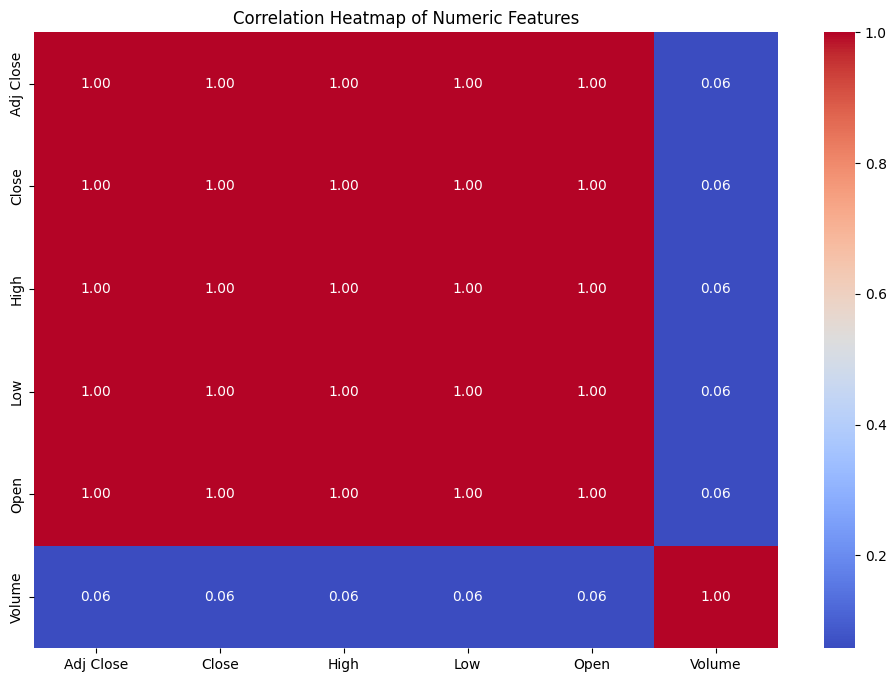

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
print(df.describe())

           Adj Close          Close           High            Low  \
count   21936.000000   21936.000000   21936.000000   21936.000000   
mean    98390.479980   98390.479980   98401.613813   98379.283157   
std      3442.648884    3442.648884    3442.176854    3443.061852   
min     91376.632812   91376.632812   91383.453125   91347.031250   
25%     95804.253906   95804.253906   95821.275391   95796.068359   
50%     97742.187500   97742.187500   97751.011719   97731.933594   
75%    100634.105469  100634.105469  100643.742188  100620.160156   
max    108240.085938  108240.085938  108240.085938  108240.085938   

                Open        Volume         SMA_20         EMA_20  Z_Score  
count   21936.000000  1.254500e+04   21917.000000   21936.000000      0.0  
mean    98390.416990  5.203058e+07   98393.177139   98391.740430      NaN  
std      3442.626092  1.151181e+08    3437.601039    3433.811483      NaN  
min     91347.031250  2.048000e+03   91533.939844   91610.115394      NaN 

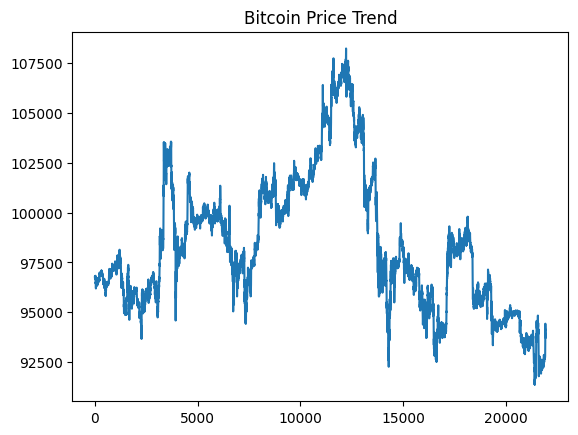

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Bitcoin Price Trend')
plt.show()

Market Dynamics analysis

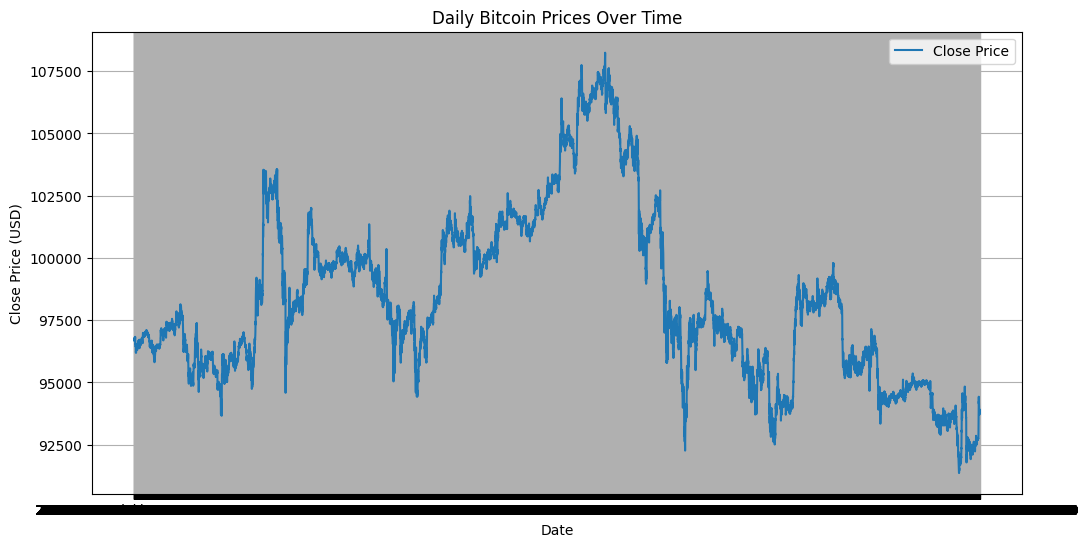

In [ ]:
# Plot short range closing prices
plt.figure(figsize=(12, 6))
plt.plot(df["Price"], df["Close"], label="Close Price")
plt.title("Daily Bitcoin Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid()
plt.show()

Model preparation

In [ ]:
df["Rolling_Mean"] = df["Close"].rolling(window=5).mean()
df["Rolling_Std"] = df["Close"].rolling(window=5).std()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 14546.002764961691
Mean Squared Error: 5739.889301732968
Mean Squared Error: 14979.402570895101
Mean Squared Error: 7938.875647033168
Mean Squared Error: 5550.98482255914


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 5550.98482255914
Mean Absolute Error: 49.46249647094833
R-squared: 0.996628702412528


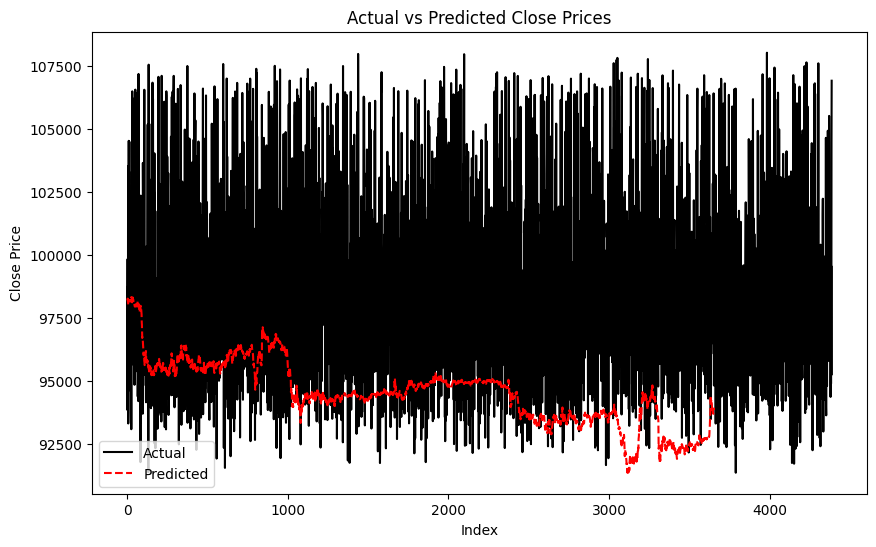

In [ ]:
import matplotlib.pyplot as plt

# Ensure the indices align
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred, index=y_test.index)  # Assign the same index to y_pred

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted", color='red', linestyle='--')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.show()

In [3]:
import torch
import torch.nn as nn
import numpy as np

# Define LSTM Model
class CryptoLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CryptoLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

# Data (Simulated Cryptocurrency Prices)
X_train = torch.tensor(np.random.rand(1000, 10, 1), dtype=torch.float32)  # (samples, sequence_length, features)
y_train = torch.tensor(np.random.rand(1000, 1), dtype=torch.float32)

# Initialize Model
model = CryptoLSTM(input_size=1, hidden_size=50, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(50):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Predict
X_test = torch.tensor(np.random.rand(1, 10, 1), dtype=torch.float32)
predicted_price = model(X_test).item()
print(f"Predicted Price: {predicted_price}")

Predicted Price: 0.4796037971973419


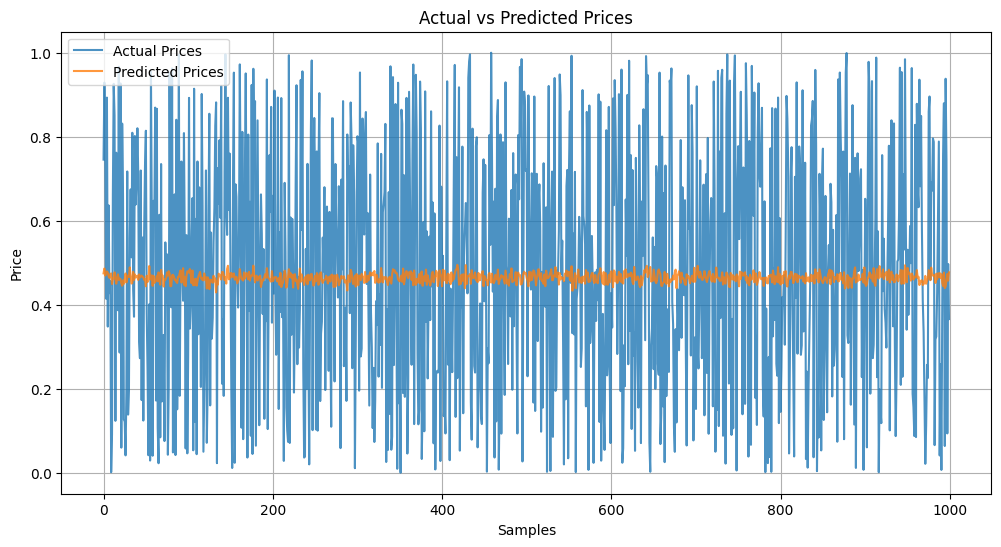

In [14]:
import matplotlib.pyplot as plt

# Generate Predictions for Training Data (or Testing Data)
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_train = model(X_train).squeeze().numpy()  # Predictions for all training data
    y_actual_train = y_train.squeeze().numpy()  # Actual values for all training data

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_actual_train, label="Actual Prices", alpha=0.8)
plt.plot(y_pred_train, label="Predicted Prices", alpha=0.8)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()